##### 1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

See sorted_text.py file.

##### 2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown. 

See readme.md file.

In [1]:
# Initial Setup
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

##### 3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a bar chart. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. 

In [2]:
# Read in text and break into sentences
milt_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')
print(milt_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [3]:
# Read in stop words and add other meaningless words to set
stops = set(nltk.corpus.stopwords.words('english'))
stops.add('thou')
stops.add('thy')
stops.add('thee')
stops.add('thus')
stops.add('shall')
stops.add('yet')
stops.add('though')
stops.add('may')
stops.add('hath')

stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'hath',
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'may',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'o

In [4]:
# Remove stop words, non-alphanumeric "words", and words with fewer than 3 characters from text
filt_milt_list = []

for sentence in milt_sentences:
    filtered_milt = [word for word in sentence if word.isalnum() and word.lower() not in stops and len(word)>2]
    filt_milt_list = filt_milt_list+filtered_milt
filt_milt_list

['Paradise',
 'Lost',
 'John',
 'Milton',
 '1667',
 'Book',
 'Man',
 'first',
 'disobedience',
 'fruit',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'World',
 'woe',
 'loss',
 'Eden',
 'till',
 'one',
 'greater',
 'Man',
 'Restore',
 'regain',
 'blissful',
 'seat',
 'Sing',
 'Heavenly',
 'Muse',
 'secret',
 'top',
 'Oreb',
 'Sinai',
 'didst',
 'inspire',
 'shepherd',
 'first',
 'taught',
 'chosen',
 'seed',
 'beginning',
 'heavens',
 'earth',
 'Rose',
 'Chaos',
 'Sion',
 'hill',
 'Delight',
 'Siloa',
 'brook',
 'flowed',
 'Fast',
 'oracle',
 'God',
 'thence',
 'Invoke',
 'aid',
 'adventurous',
 'song',
 'middle',
 'flight',
 'intends',
 'soar',
 'Aonian',
 'mount',
 'pursues',
 'Things',
 'unattempted',
 'prose',
 'rhyme',
 'chiefly',
 'Spirit',
 'dost',
 'prefer',
 'temples',
 'upright',
 'heart',
 'pure',
 'Instruct',
 'know',
 'first',
 'Wast',
 'present',
 'mighty',
 'wings',
 'outspread',
 'Dove',
 'like',
 'sat',
 'brooding',
 'vast',
 'Abyss',
 '

In [5]:
# Lemmatize remaining words in text

# I chose Lemmatize because I think that grouping together words that share the same root word is a valuable exercise when
# analyzing text.  However, when my results for the top 20 words included both "man" and "men," I ran the code again using
# Stemming instead of Lemmatizing to see if it would address that issue.  It did not.  So I decided to stick with my original
# choice of Lemmatization based on the reasons mentioned above.

lemm = WordNetLemmatizer()
for word in filt_milt_list:
    word=lemm.lemmatize(word)
print(filt_milt_list)

['Paradise', 'Lost', 'John', 'Milton', '1667', 'Book', 'Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'prose', 'rhyme', 'chiefly', 'Spirit', 'dost', 'prefer', 'temples', 'upright', 'heart', 'pure', 'Instruct', 'know', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'brooding', 'vast', 'Abyss', 'mad', 'pregnant', 'dark', 'Illumine', 'low', 'raise', 'support', 'height', 'great', 'argument',

In [12]:
# Identify top 20 occurrences
top_20=dict(Counter(filt_milt_list).most_common(20))
print(top_20)

{'Heaven': 412, 'God': 258, 'first': 156, 'Man': 135, 'high': 128, 'Hell': 117, 'day': 117, 'Earth': 115, 'one': 114, 'great': 113, 'far': 104, 'earth': 102, 'Adam': 102, 'good': 100, 'things': 99, 'like': 98, 'might': 98, 'world': 96, 'Eve': 96, 'light': 93}


{'Heaven': 412, 'God': 258, 'first': 156, 'Man': 135, 'high': 128, 'Hell': 117, 'day': 117, 'Earth': 115, 'one': 114, 'great': 113, 'far': 104, 'earth': 102, 'Adam': 102, 'good': 100, 'things': 99, 'like': 98, 'might': 98, 'world': 96, 'Eve': 96, 'light': 93}


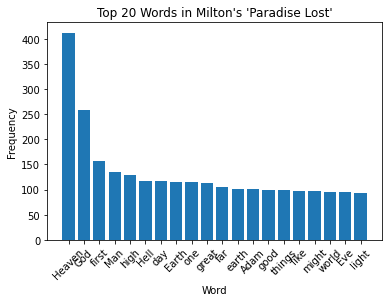

In [7]:
plt.bar(top_20.keys(),top_20.values())
plt.title("Top 20 Words in Milton's 'Paradise Lost'")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

##### 4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

In [46]:
# I understand that the sentiment analyzer has to be passed a list of sentences for it to work properly, but I am really
# struggling with getting that format for the text.  When I use .words or .sents, I get a list of strings.  So when I try to
# iterate through each sentence, the loop is iterating through each character in the strings instead.  Needless to say, there
# isn't much sentiment to be analyzed from a single character.  :(

# I have to move on at this point, so I hope I have done enough here to show sufficient understanding.

analyzer = SentimentIntensityAnalyzer()
neg_dict = {}
pos_dict = {}
neu_dict = {}

for sentence in milt_sentences:
    #convert sentences from list of words to string of words
    sentence = [' '.join(x for x in sentence)]
    sia = SentimentIntensityAnalyzer()
    sia_scores = sia.polarity_scores(str(sentence))
    
    if sia_scores['compound'] >= 0.995 :
        pos_dict.update({str(sentence): sia_scores['compound']})
    elif sia_scores['compound'] <= - 0.9886 :
        neg_dict.update({str(sentence): sia_scores['compound']})
    elif abs(sia_scores['compound']) == 0:
        neu_dict.update({str(sentence): sia_scores['compound']})
    else:
        continue
        
print("MOST NEGATIVE SENTENCES")    
print(sorted(neg_dict.items(), key =
             lambda kv:(kv[1], kv[0])))

print("MOST POSITIVE SENTENCES")
print(sorted(pos_dict.items(), key =
             lambda kv:(kv[0], kv[1])))

print("MOST NEUTRAL SENTENCES")
print(sorted(neu_dict.items(), key =
             lambda kv:(kv[1], kv[0])))

MOST NEGATIVE SENTENCES
[('["that now , While time was , our first parents had been warned The coming of their secret foe , and \' scaped , Haply so \' scaped his mortal snare : For now Satan , now first inflamed with rage , came down , The tempter ere the accuser of mankind , To wreak on innocent frail Man his loss Of that first battle , and his flight to Hell : Yet , not rejoicing in his speed , though bold Far off and fearless , nor with cause to boast , Begins his dire attempt ; which nigh the birth Now rolling boils in his tumultuous breast , And like a devilish engine back recoils Upon himself ; horrour and doubt distract His troubled thoughts , and from the bottom stir The Hell within him ; for within him Hell He brings , and round about him , nor from Hell One step , no more than from himself , can fly By change of place : Now conscience wakes despair , That slumbered ; wakes the bitter memory Of what he was , what is , and what must be Worse ; of worse deeds worse sufferings m

##### 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

Some of the Sentiment Analysis is correct, but overall, I would have to say that they are not correctly categorized.  A large portion of the "negative" sentences pertain to Christ's resurrection and victory over death.  The "positive" sentences seem more neutral to me, as they are primarily descriptive without making any judgments about the descriptions.  The neutral sentences are the only ones I would say are appropriately categorized.

I think that the primary reason for this is the fact that the language in Milton's text is from another era, and many of the words are either used differently today, or are not used at all.  This made it difficult for Vader Sentiment Analysis to be effective.

### DataCamp

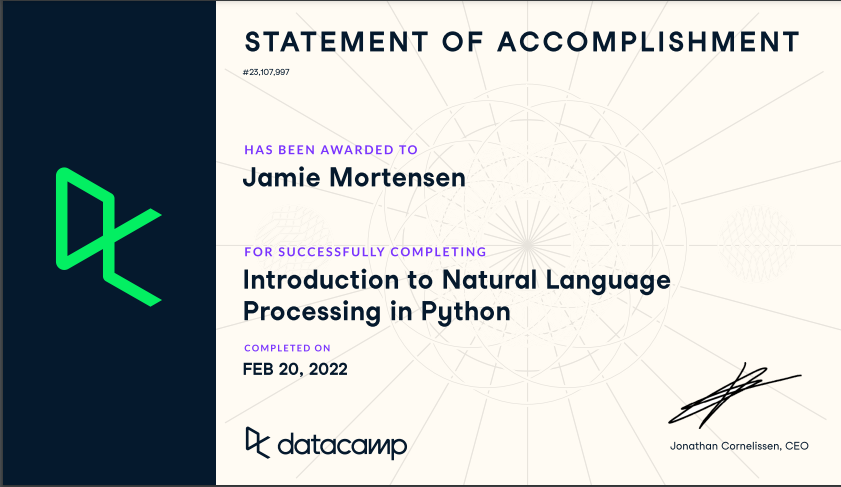